# Data Programming - Problem Set 3

## Question 1
Introduction:
- Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.
- Occupations
    - Step 1. Import the necessary libraries
    - Step 2. Import the dataset from this address. 
    - Step 3. Assign it to a variable called users
    - Step 4. Discover what is the mean age per occupation
    - Step 5. Discover the Male ratio per occupation and sort it from the most to the least
    - Step 6. For each occupation, calculate the minimum and maximum ages
    - Step 7. For each combination of occupation and sex, calculate the mean age
    - Step 8. For each occupation present the percentage of women and men

In [1]:
# Step 1: Import the necessary libraries.

import pandas as pd
import numpy as np

In [2]:
# Step 2: Import dataset from this address.
# Step 3: Assign it to a variable called users.

users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep = "|")
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
# Step 4: Discover what is the mean age per occupation.

users.groupby('occupation')['age'].mean().astype(int)

occupation
administrator    38
artist           31
doctor           43
educator         42
engineer         36
entertainment    29
executive        38
healthcare       41
homemaker        32
lawyer           36
librarian        40
marketing        37
none             26
other            34
programmer       33
retired          63
salesman         35
scientist        35
student          22
technician       33
writer           36
Name: age, dtype: int32

In [4]:
# Step 5: Discover the male ratio per occupation and sort it from the most to the least.

male_users = users[users['gender']=='M']                                           # taking all the rows having gender male.
male = male_users.groupby(['occupation']).gender.count()                              # getting male users and count.
total_users = users.groupby(['occupation']).gender.count()                            # getting total users and count.
male_ratio = ((male / total_users) * 100).sort_values(ascending = False).astype(int)  # sorting from most to least

print(male_ratio)

occupation
doctor           100
engineer          97
technician        96
retired           92
programmer        90
executive         90
scientist         90
entertainment     88
lawyer            83
salesman          75
educator          72
student           69
other             65
marketing         61
writer            57
none              55
administrator     54
artist            53
librarian         43
healthcare        31
homemaker         14
Name: gender, dtype: int32


In [5]:
# Step 6: For each occupation, calculate the minimum and maximum ages.

users.groupby(['occupation']).agg({'age':[np.min,np.max]})

age     
              amin amax
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60

In [6]:
# Step 7: For each combination of occupation and sex, calculate the mean age.

users.groupby(['occupation','gender']).age.mean().astype(int)

occupation     gender
administrator  F         40
               M         37
artist         F         30
               M         32
doctor         M         43
educator       F         39
               M         43
engineer       F         29
               M         36
entertainment  F         31
               M         29
executive      F         44
               M         38
healthcare     F         39
               M         45
homemaker      F         34
               M         23
lawyer         F         39
               M         36
librarian      F         40
               M         40
marketing      F         37
               M         37
none           F         36
               M         18
other          F         35
               M         34
programmer     F         32
               M         33
retired        F         70
               M         62
salesman       F         27
               M         38
scientist      F         28
               M         3

In [7]:
# Step 8: For each occupation present the percent of women and men.

sex = users.groupby(['occupation','gender']).gender.count()
total = users.groupby(['occupation']).gender.count()
percent = (sex / total) * 100
print(percent.astype(int))

occupation     gender
administrator  F          45
               M          54
artist         F          46
               M          53
doctor         M         100
educator       F          27
               M          72
engineer       F           2
               M          97
entertainment  F          11
               M          88
executive      F           9
               M          90
healthcare     F          68
               M          31
homemaker      F          85
               M          14
lawyer         F          16
               M          83
librarian      F          56
               M          43
marketing      F          38
               M          61
none           F          44
               M          55
other          F          34
               M          65
programmer     F           9
               M          90
retired        F           7
               M          92
salesman       F          25
               M          75
scientist      F     

# Question 2
- Euro Teams
    - Step 1. Import the necessary libraries
    - Step 2. Import the dataset from this address
    - Step 3. Assign it to a variable called euro12
    - Step 4. Select only the Goal column
    - Step 5. How many team participated in the Euro2012?
    - Step 6. What is the number of columns in the dataset?
    - Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
    - Step 8. Sort the teams by Red Cards, then to Yellow Cards
    - Step 9. Calculate the mean Yellow Cards given per Team
    - Step 10. Filter teams that scored more than 6 goals
    - Step 11. Select the teams that start with G
    - Step 12. Select the first 7 columns
    - Step 13. Select all columns except the last 3
    - Step 14. Present only the Shooting Accuracy from England, Italy and Russia


In [8]:
# Step 1: Import the necessary libraries.
# Already imported above.

# Step 2: Import dataset from the address.
# Step 3: Assign it to a variable called euro12.

euro12 = pd.read_table('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', 
                       delimiter=',')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [9]:
# Step 4: Select only the Goal column

print((euro12['Goals']).to_string(index=False))

 4
 4
 4
 5
 3
10
 5
 6
 2
 2
 6
 1
 5
12
 5
 2


In [10]:
# Step 5: How many team participated in the Euro2012?

euro12.Team.count()

16

In [11]:
# Step 6: What is the number of columns in the dataset?

len(euro12.columns)

35

In [12]:
# Step 7: View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

discipline = euro12[['Team','Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [13]:
# Step 8: Sort the teams by Red Cards, then to Yellow Cards

discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [14]:
# Step 9: Calculate the mean Yellow Cards given per Team

euro12.groupby(['Team'])['Yellow Cards'].mean().astype(int)

Team
Croatia                 9
Czech Republic          7
Denmark                 4
England                 5
France                  6
Germany                 4
Greece                  9
Italy                  16
Netherlands             5
Poland                  7
Portugal               12
Republic of Ireland     6
Russia                  6
Spain                  11
Sweden                  7
Ukraine                 5
Name: Yellow Cards, dtype: int32

In [15]:
# Step 10: Filter teams that scored more than 6 goals

euro12[(euro12['Goals']  > 6)]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [16]:
# Step 11. Select the teams that start with G

euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [17]:
# Step 12: Select the first 7 columns

euro12[euro12.columns[0:7]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [18]:
# Step 13. Select all columns except the last 3

euro12.iloc[:,0:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [19]:
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia

shoot_accuracy = euro12[euro12['Team'].isin(['Russia', 'Italy','England'])]
shoot_accuracy[['Shooting Accuracy','Team']]

,Shooting Accuracy,Team
3,50.0%,England
7,43.0%,Italy
12,22.5%,Russia


# Question 3
- Housing
    - Step 1. Import the necessary libraries
    - Step 2. Create 3 differents Series, each of length 100, as follows:
        - The first a random number from 1 to 4
        - The second a random number from 1 to 3
        - The third a random number from 10,000 to 30,000
    - Step 3. Create a DataFrame by joinning the Series by column
    - Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
    - Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
    - Step 6. Ops it seems it is going only until index 99. Is it true?
    - Step 7. Reindex the DataFrame so it goes from 0 to 299

In [20]:
# Step 1: Import the necesary libraries
# Already imported above.

# Step 2: Create 3 differents sereis, each of length 100, as follows: 
# The first random number from 1 to 4

first = np.random.randint(1, 4, 100)
first

array([2, 1, 3, 1, 2, 2, 3, 3, 2, 2, 1, 3, 1, 1, 2, 1, 2, 3, 2, 3, 2, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 3, 3, 2, 3, 1, 1, 3, 2,
       1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 2, 1, 2, 2, 2, 1, 1, 2, 2, 3, 3,
       3, 3, 1, 1, 1, 2, 3, 2, 2, 1, 1, 1, 3, 1, 2, 2, 1, 2, 1, 1, 3, 1,
       3, 3, 1, 3, 2, 2, 2, 3, 2, 1, 3, 2])

In [21]:
# The second random number from 1 to 3

second = np.random.randint(1, 3, 100)
second

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1])

In [22]:
# The third random number from 10,000 to 30,000

third = np.random.randint(10000, 30000, 100)
third

array([18149, 10921, 17010, 14989, 15506, 16732, 21724, 23586, 11264,
       16854, 19519, 17759, 16170, 11150, 11062, 28021, 12901, 11613,
       29209, 26871, 22924, 29901, 22612, 28799, 15034, 28879, 16749,
       19315, 22988, 11674, 21258, 24825, 16762, 27555, 25528, 16488,
       10327, 22548, 10146, 27853, 29546, 23304, 12250, 16986, 11783,
       26857, 26534, 22948, 11462, 11794, 21410, 16628, 13742, 17541,
       19548, 19007, 28084, 27238, 16500, 23170, 21426, 23988, 18776,
       22051, 28655, 23003, 20684, 15842, 26494, 26103, 21238, 27472,
       28391, 25247, 14126, 11856, 27059, 24209, 14361, 25786, 12478,
       10816, 17823, 13921, 27093, 17179, 29041, 22181, 12221, 16533,
       20204, 27853, 29482, 28649, 11747, 10559, 22866, 28197, 12258,
       14199])

In [23]:
# Step 3: Create a DataFrame by joinning the Series by column

series_df = pd.DataFrame({'first':first, 'second':second, 'third':third})
series_df.head()

,first,second,third
0,2,2,18149
1,1,2,10921
2,3,2,17010
3,1,1,14989
4,2,2,15506


In [24]:
# Step 4: Change the name of the columns to bedrs, bathrs, price_sqr_meter

series_df = series_df.rename(columns={'first': 'bedrs', 'second': 'bathrs','third':'price_sqr_meter'})
series_df.head()

,bedrs,bathrs,price_sqr_meter
0,2,2,18149
1,1,2,10921
2,3,2,17010
3,1,1,14989
4,2,2,15506


In [25]:
# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

bigcolumn = pd.concat([pd.Series(first), pd.Series(second),pd.Series(third)], axis=0)
bigcolumn.to_frame()

,0
0,2
1,1
2,3
3,1
4,2
...,...
95,10559
96,22866
97,28197
98,12258


In [26]:
# Step 6: Ops it seems it is going only until index 99. Is it true?

# Answer: Yes

In [27]:
# Step 7: Reindex the DataFrame so it goes from 0 to 299

bigcolumn.reset_index()

,index,0
0,0,2
1,1,1
2,2,3
3,3,1
4,4,2
...,...,...
295,95,10559
296,96,22866
297,97,28197
298,98,12258


# Question 4
- Wind Statistics
- The data have been modified to contain some missing values, identified by NaN.
- Using pandas should make this exercise easier, in particular for the bonus question.
- You should be able to perform all of these operations without using a for loop or other looping construct.
- The data in 'wind.data' has the following format:
    - Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
    - 61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
    - 61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
    - 61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

- The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.
    - Step 1. Import the necessary libraries
    - Step 2. Import the dataset from this address
    - Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
    - Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
    - Step 5. Set the right dates as the index. Pay attention at the data type, it should bedatetime64.
    - Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
    - Step 7. Compute how many non-missing values there are in total.
    - Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.
    - Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location.
    - Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.
    - Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.
    - Step 12. Downsample the record to a yearly frequency for each location.
    - Step 13. Downsample the record to a monthly frequency for each location.
    - Step 14. Downsample the record to a weekly frequency for each location.
    - Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [28]:
# Step 1: Import the necessary libraries
import datetime

# Step 2: Import the dataset from the address.
url="https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data"

# Step 3: Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data = pd.read_table(url, sep='\s+')

DateTime = data['Yr'].astype(str) + '/' + data['Mo'].astype(str) + '/' + data['Dy'].astype(str)
data.insert(0, 'Date', DateTime)
data['Date'] =  pd.to_datetime(data['Date'])

# Dropping columns and Na's
data = data.drop(['Yr', 'Mo', 'Dy'], axis=1)
data

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [29]:
# Step 4: Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

def fix_time(col_name):
    if col_name.year > 2020:
        year = col_name.year - 40
    else:
        year = col_name.year
    return datetime.date(year, col_name.month, col_name.day)

data['Date'] = data['Date'].apply(fix_time)
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2021-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2021-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2021-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2021-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2021-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [30]:
data['Date'].max()

datetime.date(2030, 12, 31)

In [31]:
data['Date'].min()

datetime.date(1971, 1, 1)

In [32]:
# Step 5: Set the right dates as the index. Pay attention at the data type, it should bedatetime64.

data = data.set_index('Date')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
2021-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2021-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2021-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2021-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2021-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [33]:
# Step 6: Compute how many values are missing for each location over the entire record.They should be ignored in all 
# calculations below.

data.isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [34]:
# Step 7: Compute how many non-missing values there are in total.

data = data.dropna(axis = 0)
data.isna().sum()

RPT    0
VAL    0
ROS    0
KIL    0
SHA    0
BIR    0
DUB    0
CLA    0
MUL    0
CLO    0
BEL    0
MAL    0
dtype: int64

In [35]:
# Step 8: Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the 
# entire dataset.

data.values.mean()

10.222465245951728

In [36]:
# Step 9: Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the 
# windspeeds at each location over all the days.

loc_stats = pd.DataFrame()
 
loc_stats['min'] = data.min()
loc_stats['max'] = data.max() 
loc_stats['mean'] = data.mean()
loc_stats['std'] = data.std()
 
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.359979,5.618805
VAL,0.21,33.37,10.640267,5.268695
ROS,1.50,33.84,11.656396,5.007805
KIL,0.00,28.46,6.298587,3.600942
SHA,0.13,37.54,10.448923,4.933988
BIR,0.00,26.16,7.085066,3.967735
DUB,0.00,30.37,9.793006,4.978030
CLA,0.00,31.08,8.486601,4.498299
MUL,0.00,25.88,8.490257,4.165947
CLO,0.04,28.21,8.696705,4.500488


In [37]:
# Step 10: Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the 
# windspeeds across all the locations at each day.

day_stats = pd.DataFrame()

day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)

day_stats

,min,max,mean,std
Date,,,,
2021-01-04,1.79,11.75,6.619167,3.198126
2021-01-05,6.17,13.33,10.630000,2.445356
2021-01-06,4.42,13.21,8.240000,2.998063
2021-01-07,4.96,14.29,10.385000,3.072114
2021-01-08,5.91,16.62,10.487500,3.547237
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [38]:
# Step 11: Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

data = data.reset_index() 
data['Date'] = pd.to_datetime(data['Date'], format = '%Y/%m/%d')
January_data = data[data['Date'].dt.month == 1]
January_data = January_data.mean(axis = 0)
January_data

C:\Users\Dhairya\AppData\Local\Temp/ipykernel_21460/3761115737.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  January_data = January_data.mean(axis = 0)


RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

In [39]:
# Step 12:  Downsample the record to a yearly frequency for each location.

data.groupby(data['Date'].dt.year).sum()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1971,4114.69,3319.74,4047.24,1913.15,3445.72,2225.46,3060.85,2466.42,2889.11,2638.86,4456.26,5484.21
1972,4561.81,3865.44,4413.35,2170.27,3451.53,2327.33,3551.85,2811.17,3058.77,2750.59,4658.22,5500.51
1973,4317.39,3898.38,3898.38,2024.97,3518.92,2390.29,3095.97,2779.21,3009.62,2851.53,4441.94,5636.00
1974,4979.73,4311.30,4502.77,2345.87,4055.51,2485.57,3680.88,3612.40,3406.09,3188.77,4837.33,6185.90
1975,4383.13,3757.25,4221.12,1923.22,3354.38,2069.01,3125.35,2863.00,3211.25,2694.73,4610.56,5587.37
1976,4296.05,3734.34,3938.61,1870.05,3237.76,2309.84,3348.58,2615.51,3251.44,2885.21,4513.65,5662.55
1977,4781.36,4067.74,4609.16,2216.99,3651.40,3134.05,4205.97,3058.11,3320.84,3219.89,4912.56,6055.66
1978,4564.09,4031.16,4153.70,2220.06,3711.04,2792.49,3463.61,3212.17,3317.76,3030.12,4733.10,6121.55
2021,4150.58,3470.45,3836.17,2327.79,3652.53,2589.83,3275.31,2952.87,2914.46,3298.16,4512.33,4619.65


In [40]:
# Step 13: Downsample the record to a monthly frequency for each location.

monthly_data = data
monthly_data.groupby([monthly_data['Date'].dt.year.rename('year'),monthly_data['Date'].dt.month.rename('month')]).sum()

RPT     VAL     ROS     KIL     SHA     BIR     DUB     CLA  \
year month                                                                   
1971 1      468.04  415.35  405.48  197.29  351.61  240.55  319.22  258.85   
     2      328.29  273.20  288.73  146.78  270.95  153.78  243.15  198.10   
     3      336.19  255.54  348.08  174.50  277.76  170.09  280.92  207.70   
     4      296.53  205.44  335.63  146.74  244.95  159.57  200.64  175.70   
     5      347.22  275.39  296.51  151.54  258.01  168.12  182.15  224.14   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2030 8      296.41  260.08  294.04  147.74  248.52  175.47  185.59  171.62   
     9      357.80  362.47  331.06  195.28  344.46  230.79  245.52  237.63   
     10     414.00  370.05  352.74  206.64  363.58  261.95  337.12  313.53   
     11     411.65  359.95  363.56  195.12  325.83  245.08  307.98  246.97   
     12     396.45  299.43  437.47  176.22  310.42  191.77  281.29  215.80   

               MUL     CLO     BEL     MAL  
year month                                  
1971 1      278.36  268.67  446.17  507.16  
     2      231.64  219.34  360.75  444.17  
     3      263.33  240.51  356.81  486.03  
     4      225.38  181.54  270.42  369.03  
     5      232.34  220.80  369.71  406.34  
...            ...     ...     ...     ...  
2030 8      212.34  196.42  320.79  367.99  
     9      280.79  252.92  419.86  475.97  
     10     327.38  280.63  482.14  613.50  
     11     300.31  249.36  398.12  535.58  
     12     253.53  236.68  337.22  539.76  

[216 rows x 12 columns]

In [41]:
# Step 14: Downsample the record to a weekly frequency for each location.

weekly_data = data
weekly_data.groupby([weekly_data['Date'].dt.year.rename('year'),weekly_data['Date'].dt.month.rename('month'), weekly_data['Date'].dt.week.rename('week')]).sum()

C:\Users\Dhairya\AppData\Local\Temp/ipykernel_21460/3257433346.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  weekly_data.groupby([weekly_data['Date'].dt.year.rename('year'),weekly_data['Date'].dt.month.rename('month'), weekly_data['Date'].dt.week.rename('week')]).sum()


RPT     VAL     ROS    KIL     SHA    BIR     DUB     CLA  \
year month week                                                                 
1971 1     1     144.67  146.00  131.97  71.76  121.63  98.42  108.80  106.09   
           2      86.29   81.09   72.29  31.05   69.37  47.21   44.71   49.67   
           3     128.67  108.85  100.17  55.71   99.41  67.79   92.79   74.58   
           4      93.25   72.46   82.21  36.76   56.32  25.34   59.96   27.43   
           53     15.16    6.95   18.84   2.01    4.88   1.79   12.96    1.08   
...                 ...     ...     ...    ...     ...    ...     ...     ...   
2030 12    48      9.71    8.00    7.04   4.83    8.96   6.46    9.33    4.50   
           49     93.59   80.12   83.63  41.04   83.70  54.76   76.29   61.12   
           50     82.75   65.13   82.00  31.34   66.88  42.35   40.00   45.04   
           51     85.61   66.74   89.01  36.58   65.50  44.75   59.08   48.98   
           52     98.45   67.49  138.91  48.85   74.96  37.29   77.97   48.70   

                   MUL     CLO     BEL     MAL  
year month week                                 
1971 1     1     98.58  103.41  172.40  160.28  
           2     48.74   46.45   79.43   91.58  
           3     80.24   77.96  113.59  137.22  
           4     45.55   37.06   68.71   90.96  
           53     5.25    3.79   12.04   27.12  
...                ...     ...     ...     ...  
2030 12    48     8.75    7.17   12.54   17.41  
           49    69.24   66.74  107.62  140.05  
           50    45.63   36.38   64.34   98.16  
           51    55.71   60.76   83.46  126.42  
           52    63.33   55.88   55.63  132.26  

[1121 rows x 12 columns]

In [42]:
# Step 15: Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each
# week (assume that the first week starts on January 2 1961) for the first 52 weeks.

data = weekly_data.groupby([weekly_data['Date'].dt.year.rename('Year'),weekly_data['Date'].dt.week.rename('Week')]).sum()
mean = pd.Series(data.head(52).mean(axis = 1))
minimum = pd.Series(data.head(52).min(axis = 1))
maximum = pd.Series(data.head(52).max(axis = 1))
sd = pd.Series(data.head(52).std(axis = 1))
statistics = pd.DataFrame({'Min':minimum, 'Max':maximum, 'Mean':mean, 'Std Deviation':sd})
statistics

C:\Users\Dhairya\AppData\Local\Temp/ipykernel_21460/3906842090.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data = weekly_data.groupby([weekly_data['Date'].dt.year.rename('Year'),weekly_data['Date'].dt.week.rename('Week')]).sum()


Min     Max        Mean  Std Deviation
Year Week                                          
1971 1     71.76  172.40  122.000833      29.536590
     2     31.05   91.58   62.323333      19.857240
     3     55.71  137.22   94.748333      24.704053
     4     25.34   93.25   58.000833      23.915252
     5     12.17   84.09   39.697500      20.778227
     6     59.67  152.49   97.537500      26.335515
     7     46.41  120.76   81.894167      21.004762
     8     18.34   86.83   44.110833      22.614746
     9     19.25   94.77   48.645833      20.829098
     10    23.54  101.38   48.805833      21.566772
     11    72.33  140.70   98.439167      22.073783
     12    43.64  133.51   75.945000      23.581829
     13    38.25   93.41   59.230833      17.104058
     14    16.50   83.21   34.882500      18.528702
     15    34.09  102.17   61.267500      18.824809
     16    38.97  102.37   61.705833      17.101460
     17    16.29   65.79   36.708333      15.873489
     18    51.45  108.68   81.941667      20.536300
     19    35.96  106.90   63.560833      22.727613
     20    23.96   83.83   48.335000      19.116617
     21    29.79   91.41   55.650000      18.156921
     22    30.86  109.20   53.667500      20.631290
     23    31.94  103.24   61.353333      24.420091
     24    45.70  100.12   70.462500      19.950239
     25    39.24   87.67   64.126667      15.377896
     26    26.37   71.37   43.800833      13.890359
     27    19.05   67.95   40.035833      15.007142
     28    27.66   92.18   52.888333      18.573942
     29    25.92   86.50   46.930833      18.994408
     30    28.17   72.17   46.486667      15.627753
     31    32.08   88.00   53.521667      16.580842
     32    27.09   95.49   54.973333      18.987911
     33    16.63   81.51   39.765000      18.815635
     34    33.25   88.17   57.785000      18.221555
     35    33.49  118.41   64.185000      22.321366
     36    30.87  101.20   56.625833      17.588571
     37    14.29   63.75   32.475000      15.936813
     38    20.28   83.76   44.055000      18.576817
     39    30.11   79.05   51.323333      16.750299
     40    35.79  117.70   71.567500      20.765740
     41    40.21  128.85   77.960000      25.546485
     42    55.62  156.01   97.800000      29.682965
     43    33.08  121.92   75.008333      24.966939
     44    51.43  151.42   89.781667      27.019459
     45    33.50  147.80   65.972500      31.908198
     46    57.80  173.70   92.333333      30.868250
     47    34.09  121.03   65.929167      24.331627
     48    19.00  111.86   57.980833      27.160572
     49    21.29  137.66   56.742500      31.927123
     50    71.25  180.76  116.103333      33.748277
     51    48.87  158.92   92.515833      30.198390
     52    34.90  106.16   59.565000      24.246049

# Question 5
- Step 1. Import the necessary libraries
- Step 2. Import the dataset from this address.
- Step 3. Assign it to a variable called chipo.
- Step 4. See the first 10 entries
- Step 5. What is the number of observations in the dataset?
- Step 6. What is the number of columns in the dataset?
- Step 7. Print the name of all the columns.
- Step 8. How is the dataset indexed?
- Step 9. Which was the most-ordered item?
- Step 10. For the most-ordered item, how many items were ordered?
- Step 11. What was the most ordered item in the choice_description column?
- Step 12. How many items were orderd in total?
- Step 13.
    - Turn the item price into a float
    - Check the item price type
    - Create a lambda function and change the type of item price
    - Check the item price type
- Step 14. How much was the revenue for the period in the dataset?
- Step 15. How many orders were made in the period?
- Step 16. What is the average revenue amount per order?
- Step 17. How many different items are sold?

In [43]:
# Step 1: Import the necessary libraries
# Answer: ALready imported above

# Step 2: Import the dataset from this address.
# Step 3: Assign it to a variable called chipo.

chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')

In [44]:
# Step 4 See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [45]:
# Step 5: What is the number of observations in the dataset?

chipo.shape[0]

4622

In [46]:
# Step 6: What is the number of columns in the dataset?

chipo.shape[1]

5

In [47]:
# Step 7: Print the name of all the columns.

chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [48]:
# Step 8: How is the dataset indexed?

chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [49]:
# Step 9: Which was the most-ordered item?

chipo['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [50]:
# Step 10: For the most-ordered item, how many items were ordered?

# Answer: 726

In [51]:
# Step 11: What was the most ordered item in the choice_description column?

chipo['choice_description'].value_counts()

[Diet Coke]                                                                                                                                      134
[Coke]                                                                                                                                           123
[Sprite]                                                                                                                                          77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                                                                            42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]                                                                 40
                                                                                                                                                ... 
[Fresh Tomato Salsa (Mild), [Pinto Beans, Black Beans, Rice, Cheese, Sour Cream, Lettuce]]                

In [52]:
# Step 12: How many items were orderd in total?

chipo['quantity'].sum()

4972

In [53]:
# Step 13. 
# Turn the item price into a float 
# Check the item price type

temp_Chipo = chipo.copy()
temp_Chipo['item_price'] = temp_Chipo['item_price'].str[1:]
temp_Chipo.astype({'item_price':'float64'}).dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [54]:
# Create a lambda function and change the type of item price
# Check the item price type

Chipo = chipo.copy()
Chipo['item_price'] = Chipo['item_price'].apply(lambda x: float(x[1:]))
Chipo.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [55]:
# Step 14: How much was the revenue for the period in the dataset?

Chipo['sub_total'] = round(Chipo['item_price'] * Chipo['quantity'],2)
Chipo['sub_total'].sum()

39237.02

In [56]:
# Step 15: How many orders were made in the period?

Chipo['order_id'].nunique()

1834

In [57]:
Chipo['order_id'].count()

4622

In [58]:
# Step 16: What is the average revenue amount per order?
Chipo.groupby(['order_id']).item_price.sum().mean()

18.811428571428568

In [59]:
# Step 17: How many different items are sold?
Chipo['item_name'].nunique()

50

# Question 6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

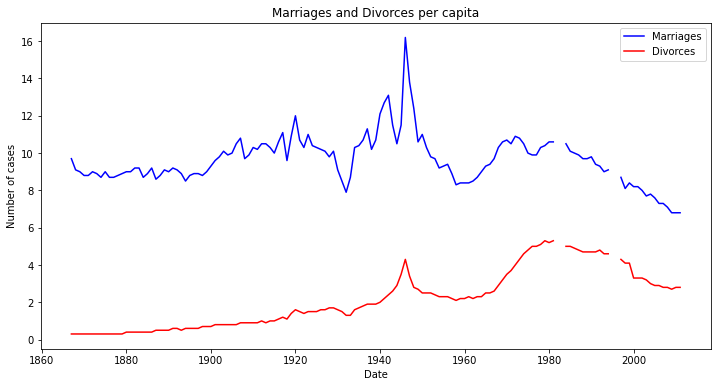

In [60]:
import matplotlib.pyplot as plt

us_marriage_divorce_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(us_marriage_divorce_data['Year'], us_marriage_divorce_data['Marriages_per_1000'], color='blue', label='Marriages')
plt.plot(us_marriage_divorce_data['Year'], us_marriage_divorce_data['Divorces_per_1000'], color='red', label='Divorces')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.title('Marriages and Divorces per capita')
plt.legend()

# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

Text(0, 0.5, 'No. of Marriages and Divroces')

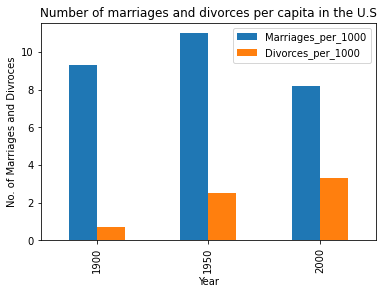

In [61]:
bar_chart = us_marriage_divorce_data[(us_marriage_divorce_data.Year == 1900) | (us_marriage_divorce_data.Year == 1950) | (us_marriage_divorce_data.Year == 2000)]
bar_chart = bar_chart.drop(columns = ['Marriages', 'Divorces', 'Population'])
bar_chart = bar_chart.set_index('Year')
bar_chart.plot.bar()
plt.title('Number of marriages and divorces per capita in the U.S')
plt.xlabel('Year')
plt.ylabel('No. of Marriages and Divroces')

# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

No handles with labels found to put in legend.


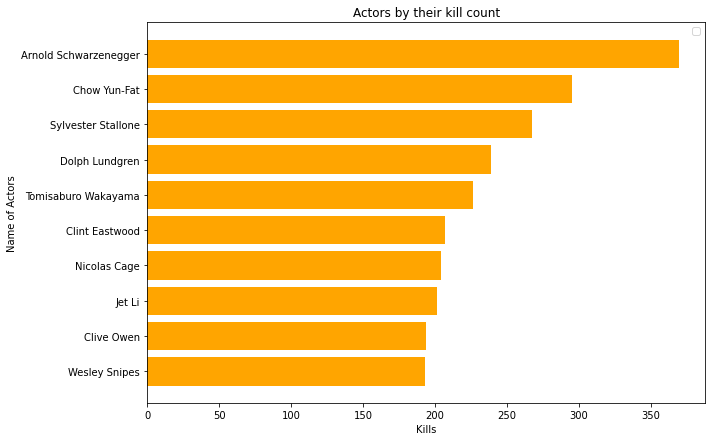

In [62]:
deadliest_actor = pd.read_csv('actor_kill_counts.csv')
deadliest_actor = deadliest_actor.sort_values(by = "Count")

plt.gcf().set_size_inches(10, 7)
plt.barh(deadliest_actor['Actor'], deadliest_actor['Count'],  color = 'orange')
plt.xlabel('Kills')
plt.ylabel('Name of Actors')
plt.title('Actors by their kill count')
plt.legend()
plt.show()

# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

Text(0.5, 1.0, 'Roman Emperors and cause of death')

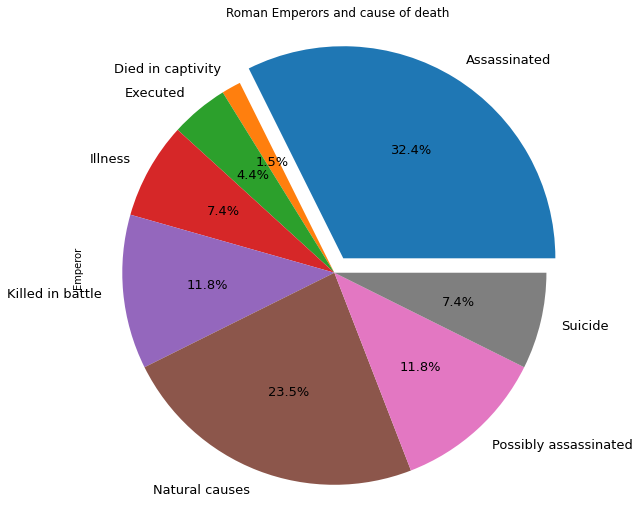

In [63]:
romans = pd.read_csv("roman-emperor-reigns.csv")
death_count = romans.groupby('Cause_of_Death')['Emperor'].count()

plot = death_count.plot.pie(y = 'Cause_of_Death', figsize = (9, 9), autopct = '%1.1f%%',
                            explode = (0.08,0,0,0,0,0,0,0), textprops = {'fontsize': 13})
plt.axis('equal')
plt.title('Roman Emperors and cause of death')

# Question 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. Don't forget to label your axes! Color each dot according to its year.

Text(0, 0.5, 'Total Arcade Revenue (billions)')

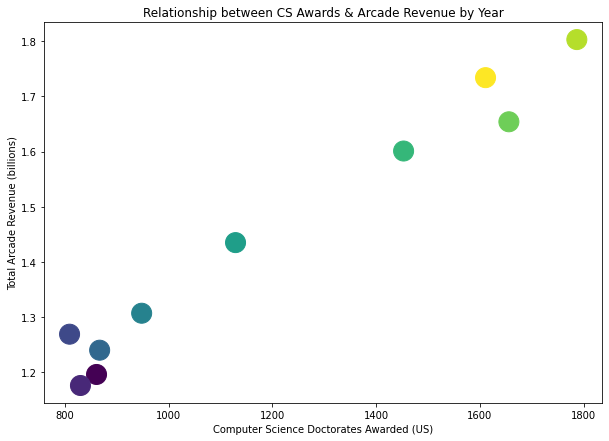

In [64]:
arcade = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")

plt.scatter(arcade['Computer Science Doctorates Awarded (US)'], 
            arcade['Total Arcade Revenue (billions)'],
            s = 400,
            c = (0,1,2,3,4,5,6,7,8,9),
            )

plt.gcf().set_size_inches(10, 7)
plt.title('Relationship between CS Awards & Arcade Revenue by Year')
plt.xlabel('Computer Science Doctorates Awarded (US)')
plt.ylabel('Total Arcade Revenue (billions)')